In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy import stats

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Q1: Using PyMC3, change the parameters of the prior beta distribution in our_first_model to match those of the previous chapter. Compare the results to the previous chapter. Replace the beta distribution with a uniform one in the interval [0,1]. Are the results equivalent to the ? Is the sampling slower, faster, or the same? What about using a larger interval such as [-1, 2]? Does the model run? What errors do you get?

In [9]:
np.random.seed(123)
trials = 150
theta_real = 0.35 # unknown value in a real experiment
data = stats.bernoulli.rvs(p=theta_real, size=trials)

In [10]:
data

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

In [11]:
with pm.Model() as our_first_model:
    θ = pm.Beta('θ', alpha=20., beta=20.)
    y = pm.Bernoulli('y', p=θ, observed=data)
    trace = pm.sample(1000, random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


&lt;IPython.core.display.HTML object&gt;

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.


In [12]:
import arviz as az

array([[&lt;AxesSubplot:title={&#39;center&#39;:&#39;θ&#39;}&gt;,
        &lt;AxesSubplot:title={&#39;center&#39;:&#39;θ&#39;}&gt;]], dtype=object)

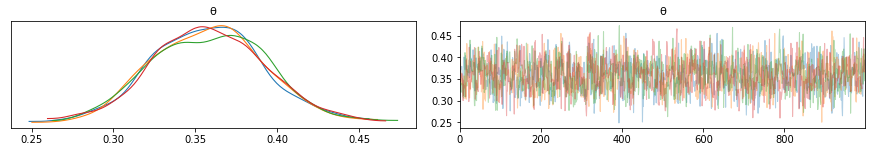

In [13]:
az.plot_trace(trace)

array([&lt;AxesSubplot:title={&#39;center&#39;:&#39;θ&#39;}&gt;], dtype=object)

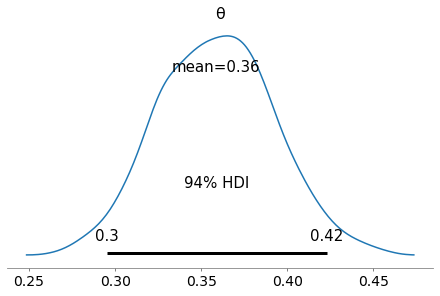

In [14]:
az.plot_posterior(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


&lt;IPython.core.display.HTML object&gt;

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.


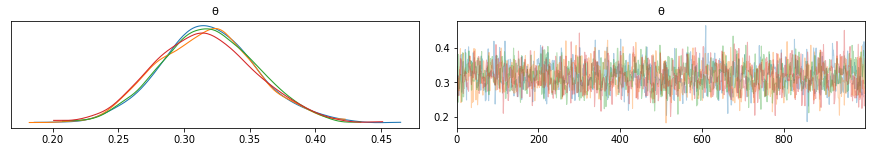

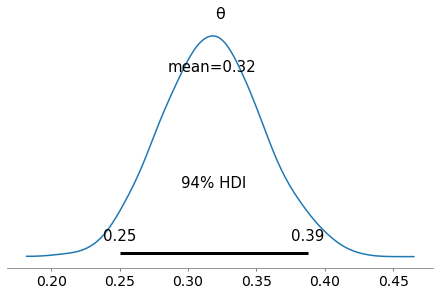

In [16]:
with pm.Model() as our_first_model:
    θ = pm.Beta('θ', alpha=1., beta=4.)
    y = pm.Bernoulli('y', p=θ, observed=data)
    trace = pm.sample(1000, random_seed=123)
    az.plot_trace(trace)
    az.plot_posterior(trace)

Trying a uniform distribution instead

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


&lt;IPython.core.display.HTML object&gt;

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.


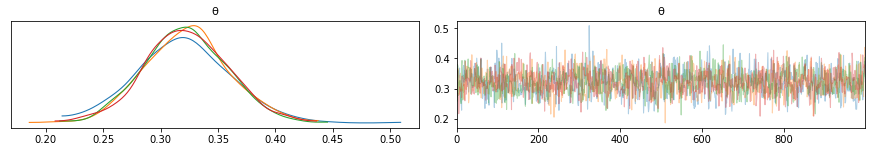

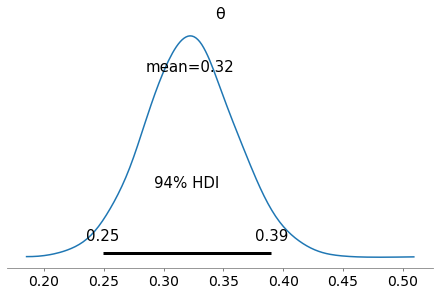

In [20]:
with pm.Model() as our_first_model:
    θ = pm.Uniform('θ', lower=0, upper=1)
    y = pm.Bernoulli('y', p=θ, observed=data)
    trace = pm.sample(1000, random_seed=123)
    az.plot_trace(trace)
    az.plot_posterior(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


&lt;IPython.core.display.HTML object&gt;

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.


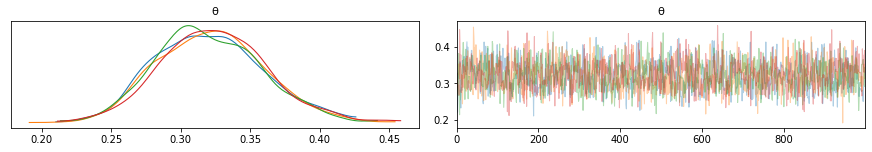

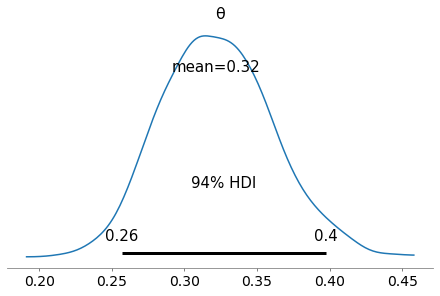

In [19]:
with pm.Model() as our_first_model:
    θ = pm.Uniform('θ', lower=-1, upper=2)
    y = pm.Bernoulli('y', p=θ, observed=data)
    trace = pm.sample(1000, random_seed=123)
    az.plot_trace(trace)
    az.plot_posterior(trace)

Q.2: Read about the coal mining disaster model that is part of the PyMC3 documentation: http://pymc-devs.github.io/pymc3/notebooks/getting_started.html#Case-study-2:-Coal-mining-disasters. Try to implement and run this model by yourself.

Text(0.5, 0, &#39;Year&#39;)

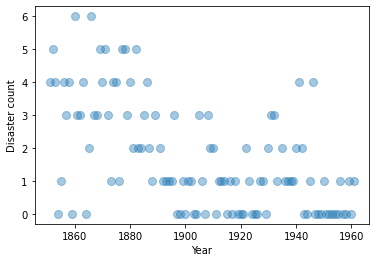

In [21]:
disaster_data = pd.Series(
    [4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
    3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
    2, 2, 3, 4, 2, 1, 3, np.nan, 2, 1, 1, 1, 1, 3, 0, 0,
    1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
    0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
    3, 3, 1, np.nan, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
    0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]
)
years = np.arange(1851, 1962)

plt.plot(years, disaster_data, "o", markersize=8, alpha=0.4)
plt.ylabel("Disaster count")
plt.xlabel("Year")

Occurences of disasters in the time series is thought to follow a Poisson process with a large rate parameter in the early part of the time series, and from one with a smaller rate in later part. We are interested in locating where this change occurred.

we are basically looking to model:

\begin{equation}
D_t \sim Poisson\left(r_t\right), r_t=\begin{cases} 
e \text{ if } t \leq s\\
l \text{ if } t \gt s
\end{cases}\\
s \sim Uniform\left(t_l, t_h\right)\\
e \sim exp\left(1\right)\\
l \sim exp\left(1\right)
\end{equation}

Where 
- $D_t$ : Number of disasters in a year $t$
- $r_t$: Rate parameter of the Poisson distribution of disasters in a year $t$
- $s$: The year in which the rate parameter changes
- $e$: the rate parameter before the switchpoint
- $l$: the rate parameter after the switchpoint
- $t_l, t_h$: The upper and lower boundaries of the year $t$